In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
# Starting with the standard imports
import numpy as np
import pandas as pd


# Preprocessing data
from sklearn.model_selection import train_test_split     # data-splitter
from sklearn.preprocessing import StandardScaler         # data-normalization
from sklearn.preprocessing import PolynomialFeatures     # for polynomials
from sklearn.pipeline import make_pipeline               # for pipelines
np.random.seed (42)                                      # for reproducible results

#
# Modeling and Metrics
# 
# --For Classifier
from sklearn.linear_model import LogisticRegression      # Classifier
from sklearn.metrics import confusion_matrix             # confusion matrix
from sklearn.metrics import classification_report        # goodness of fit report
from sklearn.metrics import roc_curve                    # draw the ROC-curve
from sklearn.metrics import roc_auc_score                # area under ROC
# --For Regressor
from sklearn.linear_model import LinearRegression        # linear regression
from sklearn.metrics import mean_squared_error, r2_score # model-metrics


# Now the Graphical libraries imports and settings
%matplotlib inline                                       
# to automatically show plots
import matplotlib.pyplot as plt                          # for plotting
import seaborn as sns                                    # nicer looking plots
from matplotlib import colors                            # for web-color specs
pd.set_option('plotting.backend', 'matplotlib')          # pandas_bokeh, plotly, etc       
plt.rcParams[ 'figure.figsize' ] = '20,10'               # landscape format figures
plt.rcParams[ 'legend.fontsize' ] = 16                   # legend font size
plt.rcParams[ 'axes.labelsize' ] = 16                    # axis label font size
plt.style.use ('ggplot')                                 # emulate ggplot style
#pd.set_option('plotting.backend', 'pandas_bokeh')        # use the bokeh backend 

# For latex-quality legends
from matplotlib import rc
rc ('font', family='serif')
rc ('text', usetex=False) # Enable it selectively -- pandas_profiling breaks
rc ('font', size=20)

import warnings
warnings.filterwarnings ('ignore')  # suppress warning

/kaggle/input/river-dataset-for-classifiers/river.csv


In [2]:
data = pd.read_csv("/kaggle/input/river-dataset-for-classifiers/river.csv", delimiter=",")
data.count()

x1    6311
x2    6311
t     6311
dtype: int64

In [3]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
x1,6311.0,3.477977,2.016079,0.002324,1.723568,3.436070,5.209477,6.999034
x2,6311.0,2.811144,84.502360,-149.995478,-69.039539,4.819181,76.604580,153.720038
t,6311.0,0.683093,0.465308,0.000000,0.000000,1.000000,1.000000,1.000000


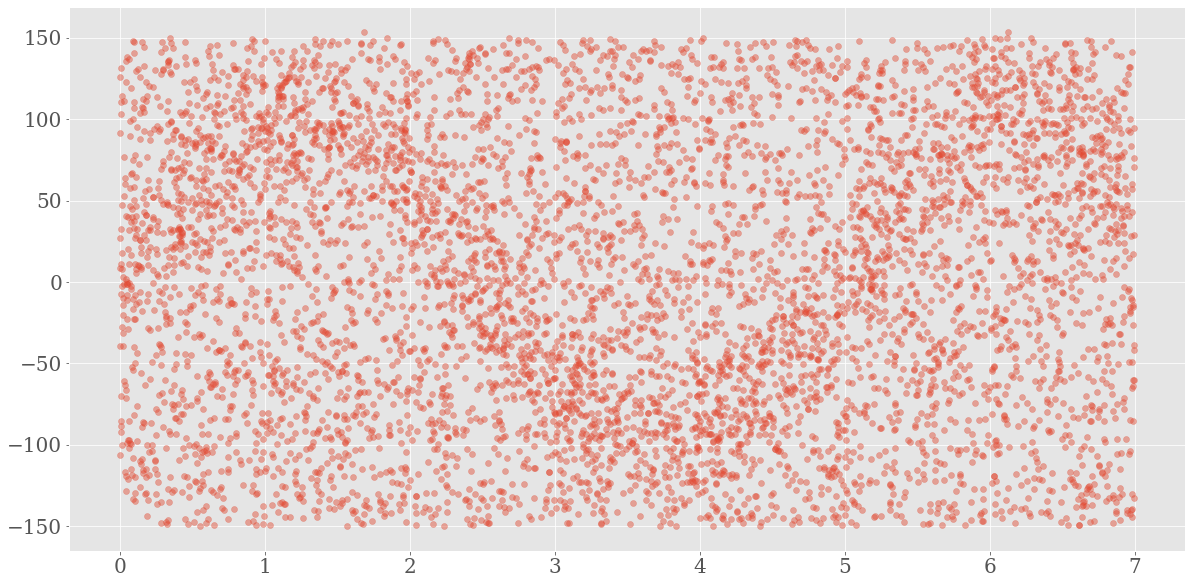

In [4]:
plt.scatter(data['x1'],data['x2'], alpha=0.45)

In [50]:
import pandas_profiling
report = pandas_profiling.ProfileReport(data)
report

**Splitting the data into test and training******

In [7]:
X, y = data[['x1','x2']], data['t'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, )

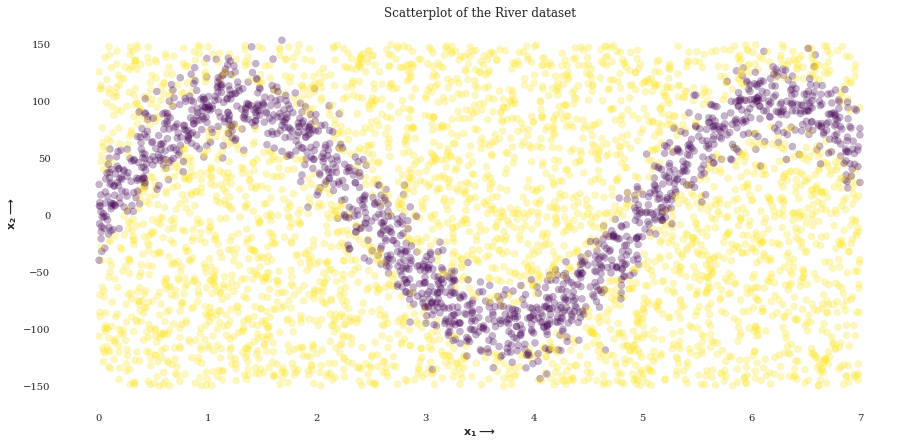

In [8]:
rc ('font', family='serif')
rc ('text', usetex=False)
rc ('font', size=20)

plt.figure(figsize=(15,7))
plt.tight_layout(pad=1.08, h_pad=20, w_pad=20, rect=None)
plt.scatter(X_train['x1'], X_train['x2'], c=y_train, cmap="viridis", alpha=0.30,  s=50,)
plt.title(r'Scatterplot of the River dataset');
plt.xlabel(r'$\mathbf{x_1 \longrightarrow}$');
plt.ylabel(r'$\mathbf{x_2 \longrightarrow}$');

A few observations stand out from the visualization above:

It seems there are two decision boundaries.
Both these decision boundaries seem to be highly nonlinear
Therefore, this should warn us that a direct application of a linear classifier may not yield success. Let us, nonetheless, proceed and see if this does come out to be true.

A DIRECT APPLICATION OF LOGISTIC REGRESSION
To begin the modeling exercise, let us directly apply the logistic regression classifier. Recall that the equation for a logistic classifier is:

log(𝑝(𝐱)1−𝑝(𝐱))=𝛽0+𝛽⋅𝐱=distance from the decision boundary
 
Let us now build the logistic model from the training data.

In [9]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

**Now we check the goodness of the fit of the model**

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
labels = clf.predict(X_test)
matrix= confusion_matrix (y_test, labels)

report = classification_report (y_test, labels)
print(matrix)
print(report)

[[   0  531]
 [   0 1047]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       531
         1.0       0.66      1.00      0.80      1047

    accuracy                           0.66      1578
   macro avg       0.33      0.50      0.40      1578
weighted avg       0.44      0.66      0.53      1578



 **Clearly the linear logistic model is not the perfect fit here as the confusion matrix is a disaster and the accuracy is just 66%**

**The next step would be to use polynomial regression of degree 5 or 6.***

POLYNOMIAL IN LOGISTIC REGRESSION


In [51]:
y_train_df = pd.DataFrame(y_train)
y_train_df.describe()

,t
count,4733.0
unique,2.0
top,1.0
freq,3264.0


In [52]:
degree      = 5
scaler      = StandardScaler()
polynomial  = PolynomialFeatures(degree)
polydata    = make_pipeline(scaler, polynomial)
X_polytrain = polydata.fit_transform(X_train)
model       = LogisticRegression()

# Fit the model to the data.
model.fit(X_polytrain, y_train)
print (f"The Model {model } \n has cofficients:\n{model.coef_}")

# Next, predict the labels for the test data.
X_polytest  = polydata.transform(X_test)
labels      = model.predict(X_polytest)

# Check how good are the predictions?
from sklearn.metrics import classification_report        # goodness of fit report
report = classification_report (y_test, labels)
print (report)

The Model LogisticRegression() 
 has cofficients:
[[ 0.30275914  0.22643592  2.89261007  0.54061753  2.46207275 -1.13208075
  -1.19852983 -8.31898021  0.00998639 -0.03495687  0.03873933 -1.83194151
   1.85573972  0.64104014  1.29931349  0.67822153  1.80059624 -0.34420661
  -0.56121784  0.02433716  0.02657713]]
              precision    recall  f1-score   support

         0.0       0.70      0.68      0.69       531
         1.0       0.84      0.85      0.85      1047

    accuracy                           0.79      1578
   macro avg       0.77      0.77      0.77      1578
weighted avg       0.79      0.79      0.79      1578



As we do the polynomial regression of degree 5 using logistic regression model then accuracy goes up a bit to 79% and the prediction is reasonably good model


Let us try to imporve a bit more and get closer to the complexity. We can feature engineer here by selecting only the river data points.

In [14]:
river = data.copy()[data.t==0] #selecting the data points of the river only
river.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x1,2000.0,3.455327,2.005875,0.002324,1.747865,3.384076,5.169797,6.999034
x2,2000.0,18.422221,72.841029,-149.728285,-47.627295,35.000755,81.276203,153.720038
t,2000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**Remember here that the question to ask is why are we doing this?
The answer to that question is we want to know where the river is and exactly where the shores/bank is 
what distinguishes them and also on both the sides.**

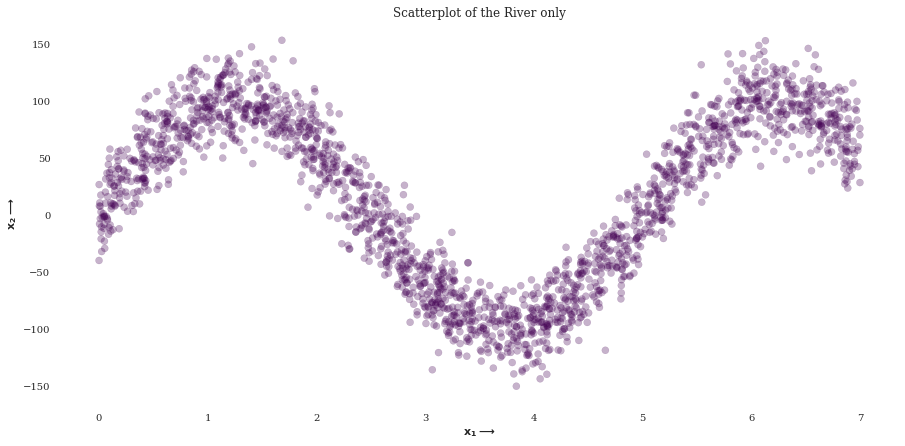

In [15]:

rc ('font', family='serif')
rc ('text', usetex=False)
rc ('font', size=20)

plt.figure(figsize=(15,7))
plt.scatter(river.x1, river.x2, c=river.t, cmap="viridis", alpha=0.30,  s=50,)
plt.title(r'Scatterplot of the River only');
plt.xlabel(r'$\mathbf{x_1 \longrightarrow}$');
plt.ylabel(r'$\mathbf{x_2 \longrightarrow}$');

Model the river with the polynomial regression

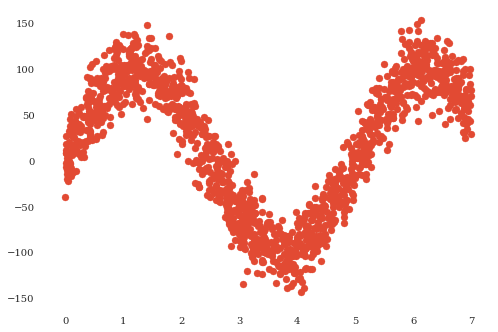

In [16]:
X_reg, y_reg = river[['x1']], river['x2']
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, random_state=42, )
plt.scatter(X_reg_train.x1.values, y_reg_train)

Remember below when we use polynomial model we are using LinearRegression and not LogisticRegression. This is because this is not the final step and we need this step to 

In [17]:
degree      = 5
scaler      = StandardScaler()
polynomial  = PolynomialFeatures(degree)
polydata    = make_pipeline(scaler, polynomial)
X_polytrain = polydata.fit_transform(X_reg_train)
model       = LinearRegression()

# Fit the model to the data.
model.fit(X_polytrain, y_reg_train)
print (f"The Model {model } \n has cofficients:\n{model.coef_}")

# Next, predict the labels for the test data.
X_polytest  = polydata.transform(X_reg_test)
labels      = model.predict(X_polytest)

# Check how good are the predictions?
mse         = mean_squared_error(y_reg_test, labels)
print(f"Mean squared error: {mse:.2f}")
r2 = r2_score(y_reg_test, labels)
print(rf"Coefficient of Determination (R^2):{r2:0.4f}")

The Model LinearRegression() 
 has cofficients:
[  0.         -85.27748081 211.67963168  75.4649456  -61.35988128
 -13.36254608]
Mean squared error: 519.64
Coefficient of Determination (R^2):0.9077


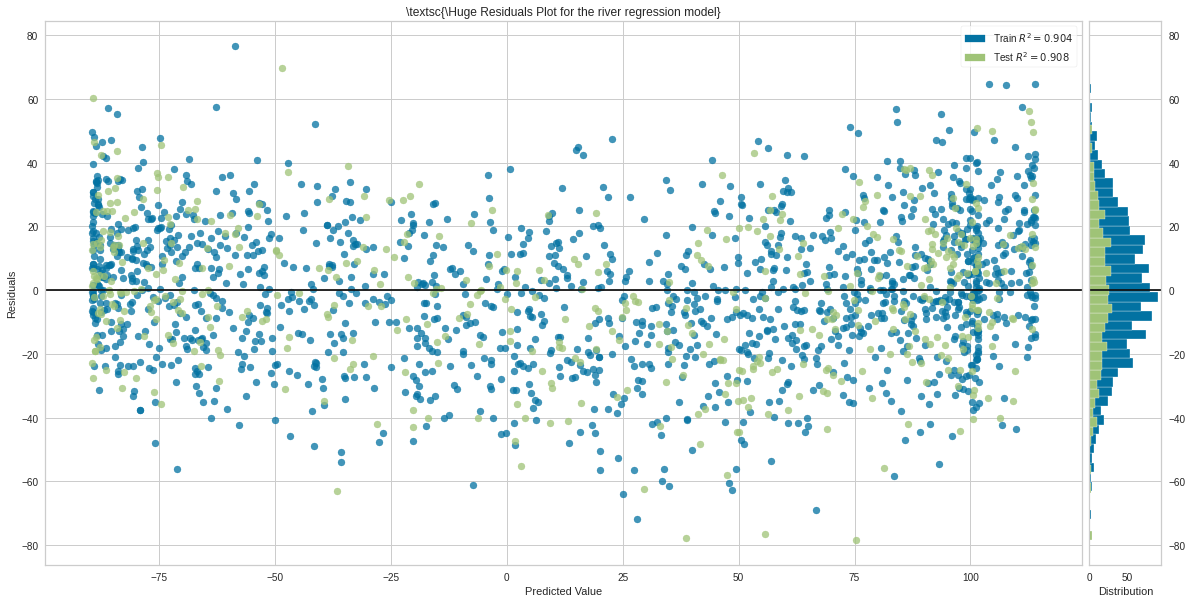

In [18]:
from yellowbrick.regressor import residuals_plot
plt.rcParams[ 'figure.figsize' ] = '20,10'               # landscape format figures
viz = residuals_plot(model, X_polytrain, y_reg_train, X_polytest, y_reg_test, 
                     title=r'\textsc{\Huge Residuals Plot for the river regression model}')

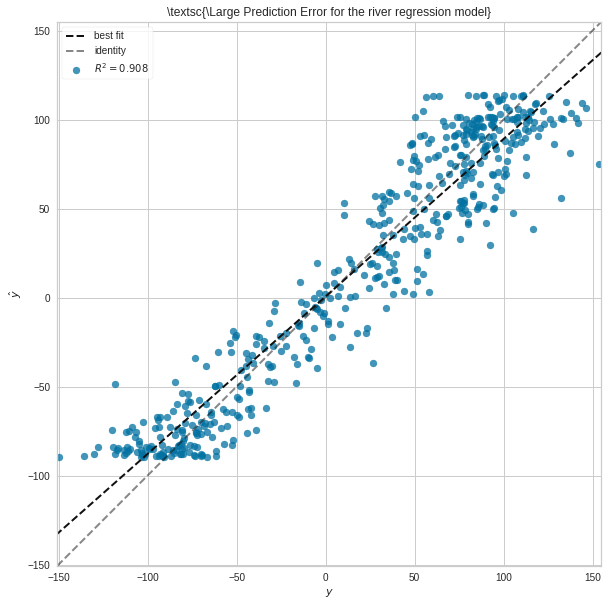

In [19]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model, X_polytrain, y_reg_train, X_polytest, y_reg_test,
                             title=r'\textsc{\Large Prediction Error for the river regression model}',
                             xlabel=r'$\mathbf{y}$', ylabel=r'$\mathbf{\hat{y}}$')

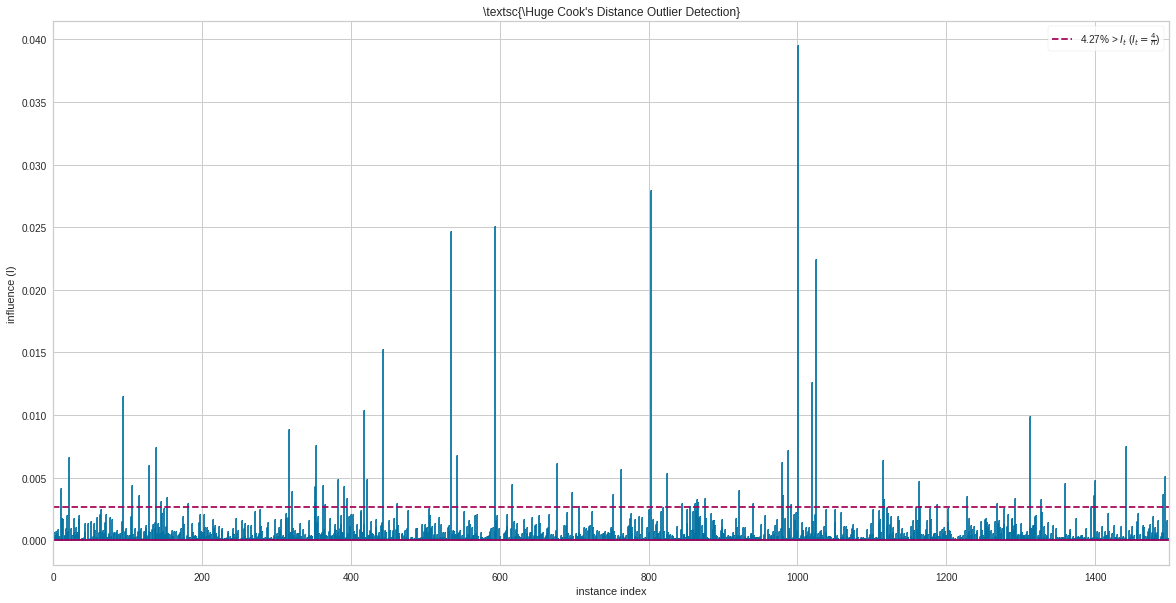

CooksDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fee8f5ba850>)

In [20]:
from yellowbrick.regressor import cooks_distance
cooks_distance(
    X_polytrain, y_reg_train,
    draw_threshold=True,
    linefmt="C0-", markerfmt=",",
    title=r"\textsc{\Huge Cook's Distance Outlier Detection}"
)

# VISUALIZE THE REGRESSION MODEL OVER THE DATA
Now that we have established that the model looks good, let us visualize its predictions to see how well it looks in reality.
Trick applied here is that we have plotted the line from the polynomial model above and then populated the river data-points in and around that. This is just to emphasize the importance of extracting the feature (feature engineering) (i.e river (t=0)) from the data

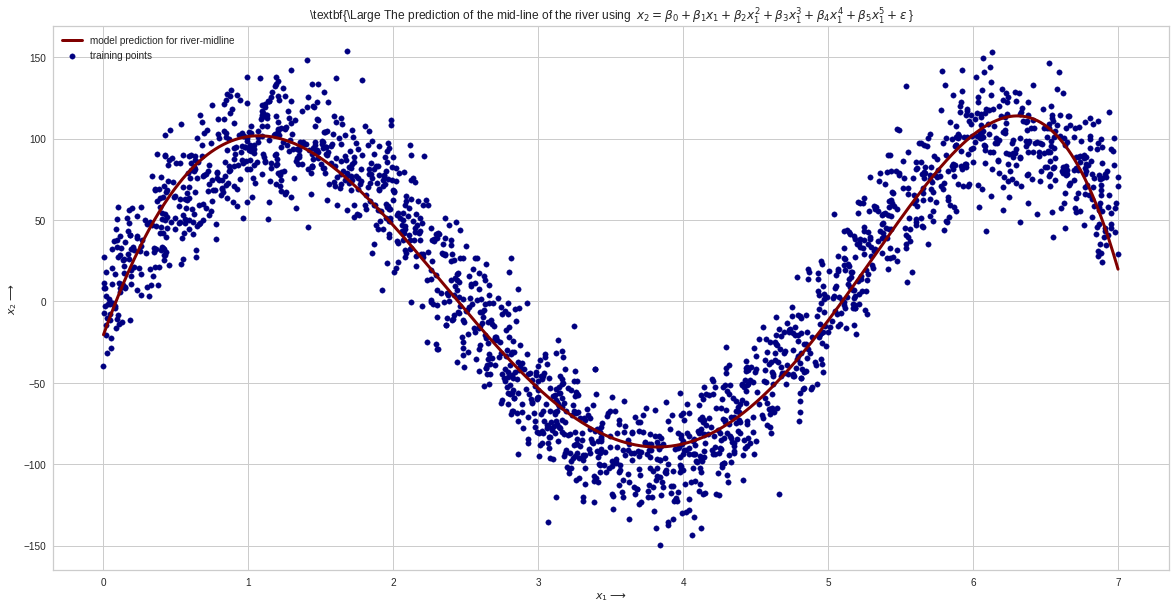

In [21]:

# To visualize this, let us create sample data in the range.
x_min = X_reg[['x1']].min()
x_max = X_reg[['x1']].max()
x_plot = np.linspace(x_min, x_max, 1000)
#X_plot = x_plot[:, np.newaxis] # matrix-version

XX = polydata.transform(x_plot)
yy = model.predict(XX)

fig, ax = plt.subplots(figsize=(20,10))
lw=3
ax.scatter(X_reg.x1, y_reg, color='navy', s=30, marker='o', label="training points")
ax.plot(x_plot, yy, color='maroon', linewidth=lw,
             label="model prediction for river-midline")
plt.xlabel(r'$x_1 \longrightarrow$')
plt.ylabel (r'$x_2 \longrightarrow$')
plt.title(r' \textbf{\Large The prediction of the mid-line of the river using  $x_2 = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \beta_3 x_1^3 + \beta_4 x_1^4 + \beta_5 x_1^5 + \epsilon$ }')
ax.legend(loc='best');

In [22]:
river_middle = model.predict(polydata.transform(data[['x1']]))
data['d'] = np.abs(data.x2 - river_middle)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
x1,6311.0,3.477977,2.016079,0.002324,1.723568,3.436070,5.209477,6.999034
x2,6311.0,2.811144,84.502360,-149.995478,-69.039539,4.819181,76.604580,153.720038
t,6311.0,0.683093,0.465308,0.000000,0.000000,1.000000,1.000000,1.000000
d,6311.0,77.946348,64.853703,0.045177,23.548933,58.550902,123.078721,259.614446


In [23]:
X = data[['d']]
y = data['t'].astype('category')
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
d,6311.0,77.946348,64.853703,0.045177,23.548933,58.550902,123.078721,259.614446


In [24]:
y.describe().transpose()

count     6311.0
unique       2.0
top          1.0
freq      4311.0
Name: t, dtype: float64

In [25]:
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X,y, random_state=42, )

BUILD AND PREDICT WITH THE FEATURE-EXTRACTED MODEL WITH LOGISTIC REGRESSION NOW

In [26]:
clf = LogisticRegression(solver='newton-cg')
clf.fit(X_clf_train, y_clf_train)

LogisticRegression(solver='newton-cg')

In [27]:
y_clf_pred = clf.predict(X_clf_test)
print (f"shape of y_pred: {y_clf_pred.shape}, shape of y_test: {y_test.shape}")

shape of y_pred: (1578,), shape of y_test: (1578,)


MODEL DIAGNOSTICS
Let us first start with the confusion matrix to see how well we did.

CONFUSION MATRIX¶

In [28]:
confusiion_matrix = confusion_matrix(y_clf_test, y_clf_pred)
print(confusion_matrix)

<function confusion_matrix at 0x7feea2478830>


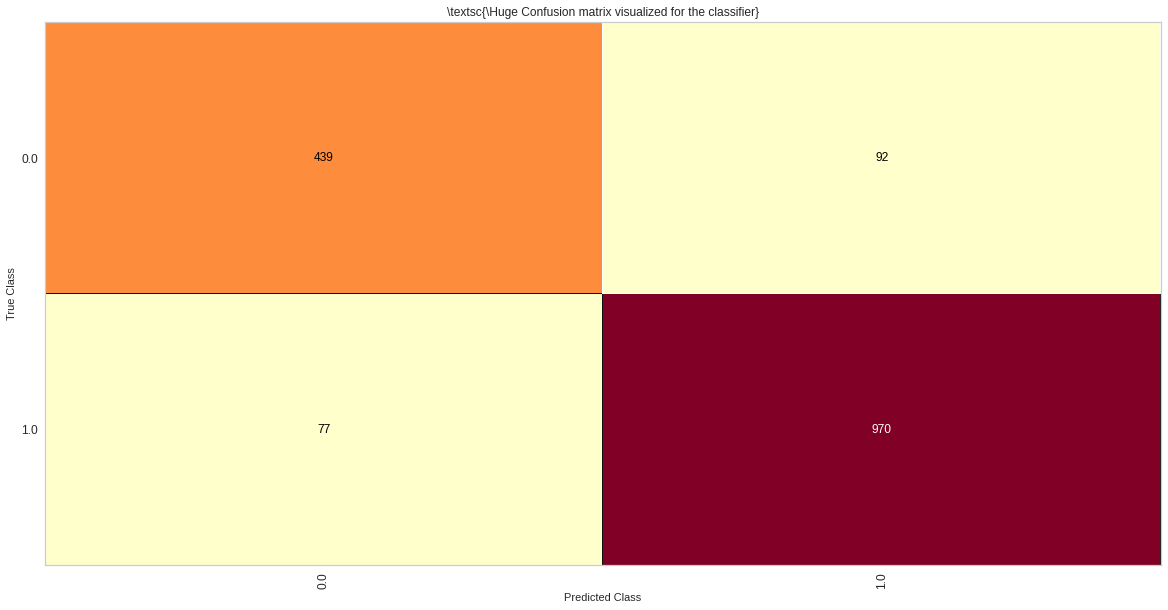

ConfusionMatrix(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fee8f383ad0>,
                classes=['0.0', '1.0'],
                cmap=<matplotlib.colors.ListedColormap object at 0x7fee6cb12a50>,
                model=None)

In [29]:
from yellowbrick.classifier import confusion_matrix

confusion_matrix (clf, X_clf_train, y_clf_train, X_clf_test, y_clf_test, classes=['0.0', '1.0'],
     title=r'\textsc{\Huge Confusion matrix visualized for the classifier}')

CLASSIFICATION REPORT

In [30]:
report = classification_report (y_clf_test, y_clf_pred)
print (report)

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84       531
         1.0       0.91      0.93      0.92      1047

    accuracy                           0.89      1578
   macro avg       0.88      0.88      0.88      1578
weighted avg       0.89      0.89      0.89      1578



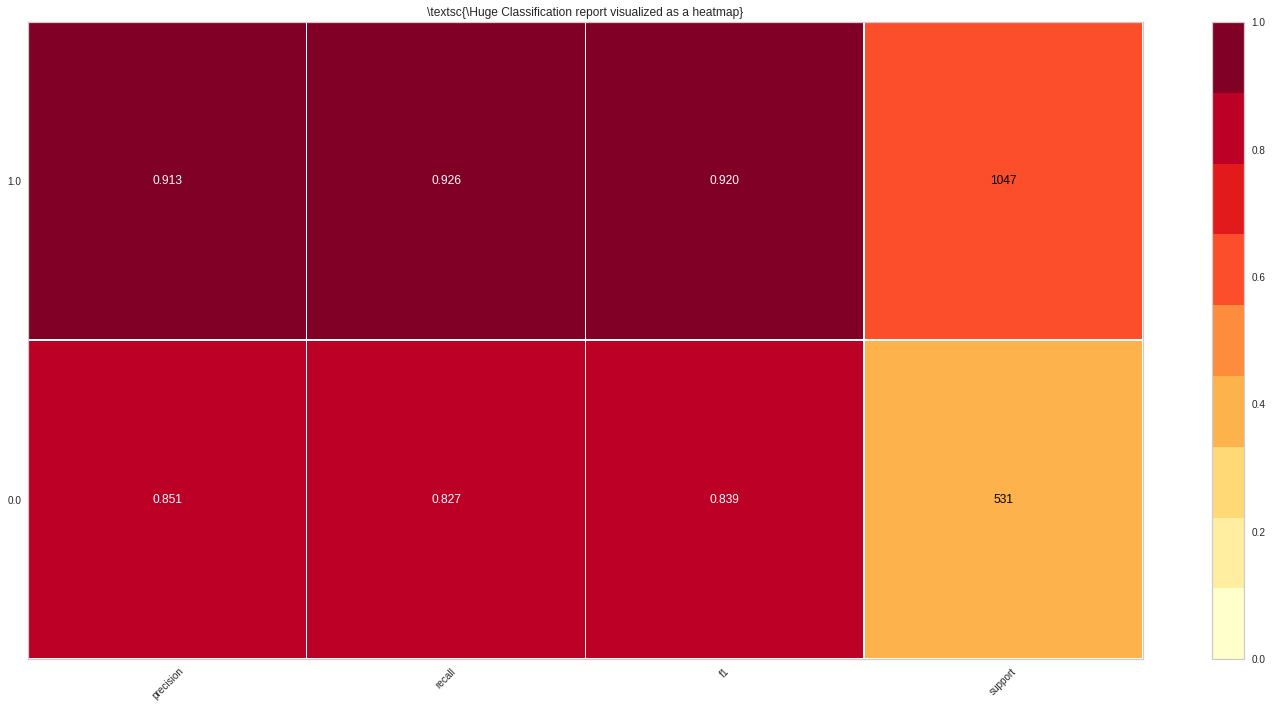

ClassificationReport(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fee6cb12650>,
                     classes=[0.0, 1.0],
                     cmap=<matplotlib.colors.ListedColormap object at 0x7fee6cb4c150>,
                     model=None, support=True)

In [31]:
from yellowbrick.classifier import classification_report
classification_report(
    clf, X_clf_train, y_clf_train, X_clf_test, y_clf_test, classes=[0.0, 1.0], support=True,
    title=r'\textsc{\Huge Classification report visualized as a heatmap}'
)

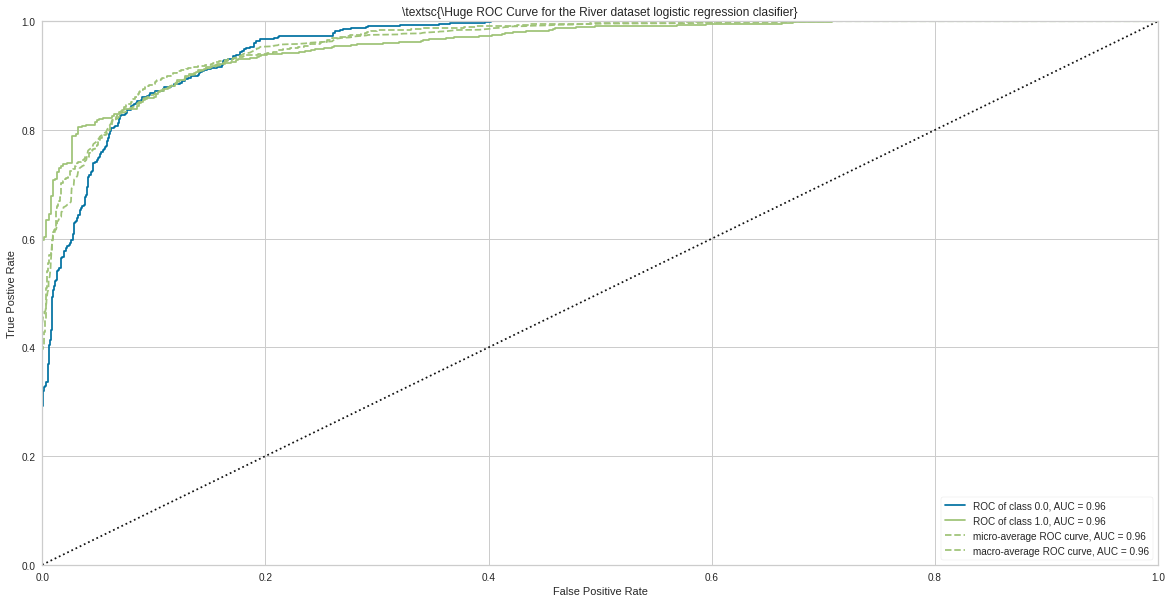

In [32]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(clf, X_clf_train, y_clf_train, X_test=X_clf_test, y_test=y_clf_test, classes=['0.0', '1.0'],                       title=r'\textsc{\Huge ROC Curve for the River dataset logistic regression clasifier}',);

CLASS PREDICTION ERRORS PLOT

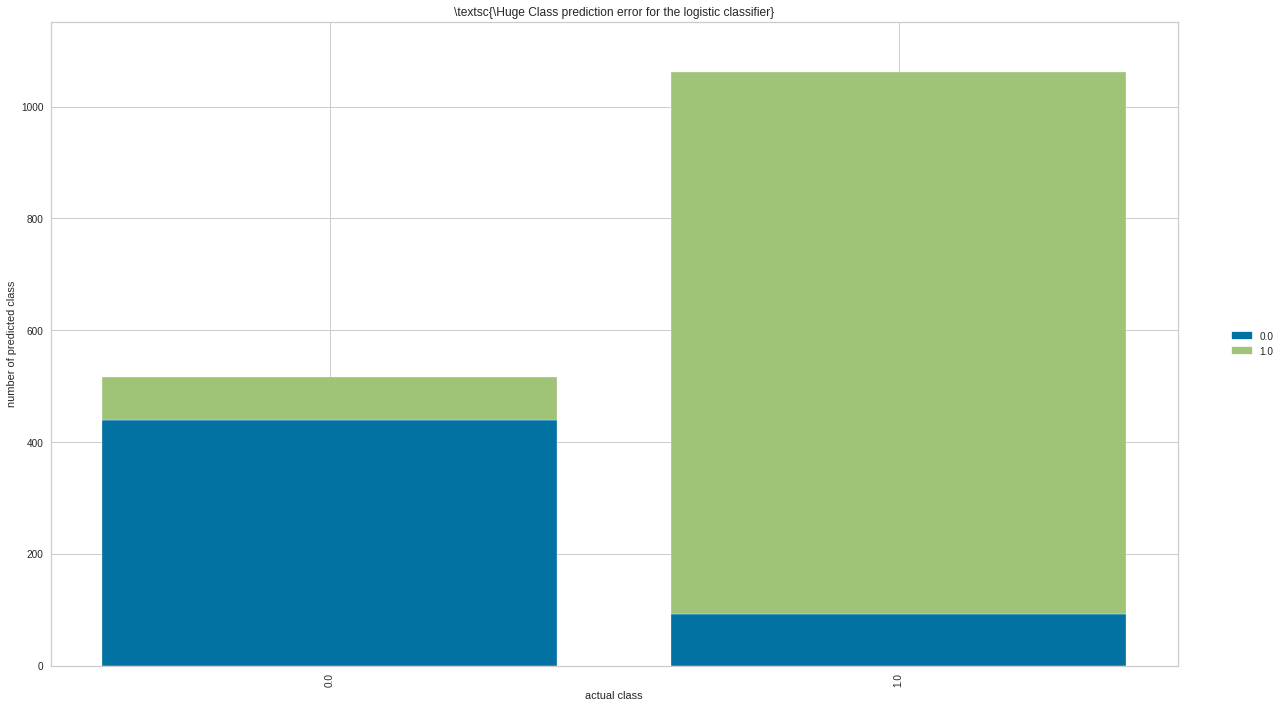

In [33]:
from yellowbrick.classifier import class_prediction_error
class_prediction_error(clf, X_clf_train, y_clf_train, X_test=X_clf_test, y_test=y_clf_test, classes=['0.0', '1.0'],                       title=r'\textsc{\Huge Class prediction error for the logistic classifier}',);

DECISION TREE CLASSIFIER ON RIVER DATASET
Let us see how the decision tree classifier fares on the river dataset.
Decision tree algorithm
- Start with the whole feature space as R0
- Find the best cut point(scan the axes till you reach the threhold of required number of points) on one of the axes(you will have two subregions)
- For each subregion
a. search for the best subregion to split next
b. best axis in the subregion.

How do we find the best cut point?
- For regression,
  remember that y^ = some function of x i.e y= f(x)
  and y = y^ + E i.e prediction plus some error
  we compute the sum squared error E = (Sumation of (Yi -Yi^)2) 
  where Yi^ = ybar i.e the average of the region under consideration (initially R0)
  This gives the point of maximum gain i.e where E is minumum
  ex. if a point in region R0 has an actual value Yi of 30 and its predicted value of Yi^ as 18. Then the difference Yi-Yi^ = 30-18 = - 12. Therefore E = 24.]
  The general idea is to spilt the region R0 into subregions such that my error goes down. We do this by finding the point of the maximum reduction.
  That means ...for diving the space R0 into R0 and R1 , we first take the avg of all the data points in R0 which is ybar.
  Then lets say we have split R0 into R1 and R2 subregions, then the error will reduce because if we take the avg of all the points in the R1 and then in R2...
  the total error will go down. This means we obtain the maximum reduction in total error. Like this we go on making subregions to minimize our error.
  
  Finding the best split points along the axes is usually done by a few mathematical techniques.
  
  R0-> R1, R2 -> R11 and R12 -> R121, R122 ==== Decision Tree.
  
- For Classification,
  The question at hand will be, A given point x is a open field point, house point or a forest point?
  Ans - First we start with the majority class. Forest in our case. 
  Then we calucate proportions or each class. Forest, Open Field and House. 
  Then we use these proportions to find out GINI Impurity and  Entropy (measure of disorder) Index. Ex. Refer to the screen shot.
  Then we solvethe problem of over fitting by pruning the tree. This is done by asking the question, which of these two regions can I merge, so that on the test data, we   get an improvement in accuracy. Refer notes. Essentially we end up with non rectanguar regions. This way we wil end up with simpler tree. This is how we solve       the   problem of over fitting by pruning. We then put a penulty factor saying that these are the number of trees we want.(threshold).
 
 
  

In [34]:

from sklearn.tree import DecisionTreeClassifier
# Let us try to make a tree no deeper than 5, since it is a simple problem.
tree_classifier = DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)

labels = tree_classifier.predict(X_test)

**MODEL DIAGNOSTICS
Let us first start with the confusion matrix to see how well we did.*

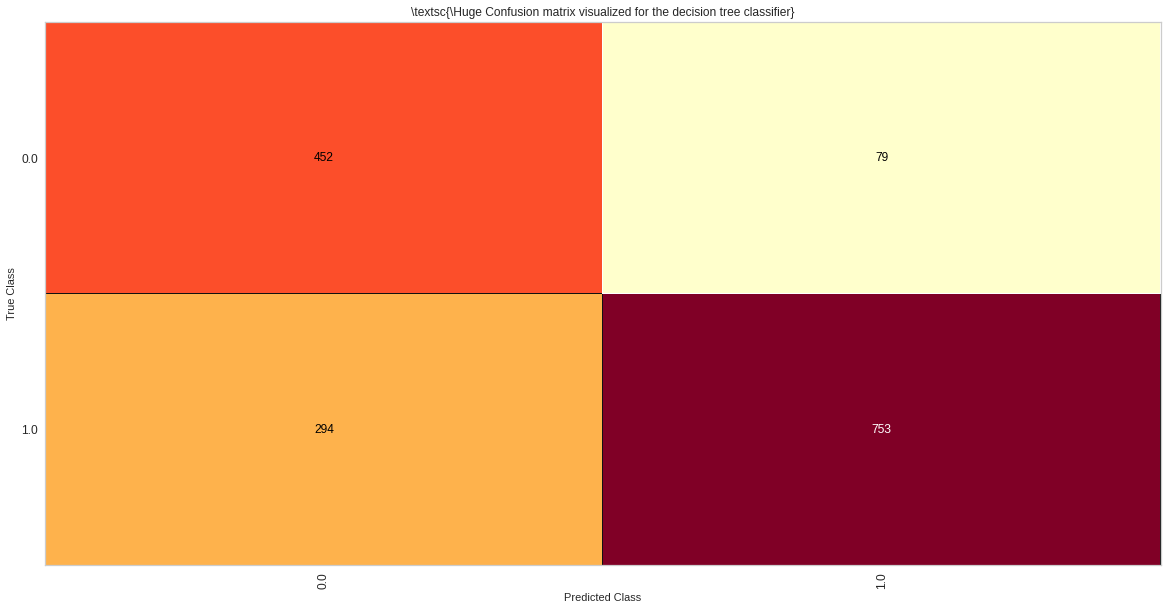

In [35]:
from yellowbrick.classifier import confusion_matrix

confusion_matrix (tree_classifier, X_train, y_train, X_test, y_test, classes=['0.0', '1.0'],
     title=r'\textsc{\Huge Confusion matrix visualized for the decision tree classifier}');

> CLASSIFICATION REPORT

In [36]:
from sklearn.metrics import classification_report
report = classification_report (y_test, labels)
print (report)

              precision    recall  f1-score   support

         0.0       0.61      0.85      0.71       531
         1.0       0.91      0.72      0.80      1047

    accuracy                           0.76      1578
   macro avg       0.76      0.79      0.75      1578
weighted avg       0.80      0.76      0.77      1578



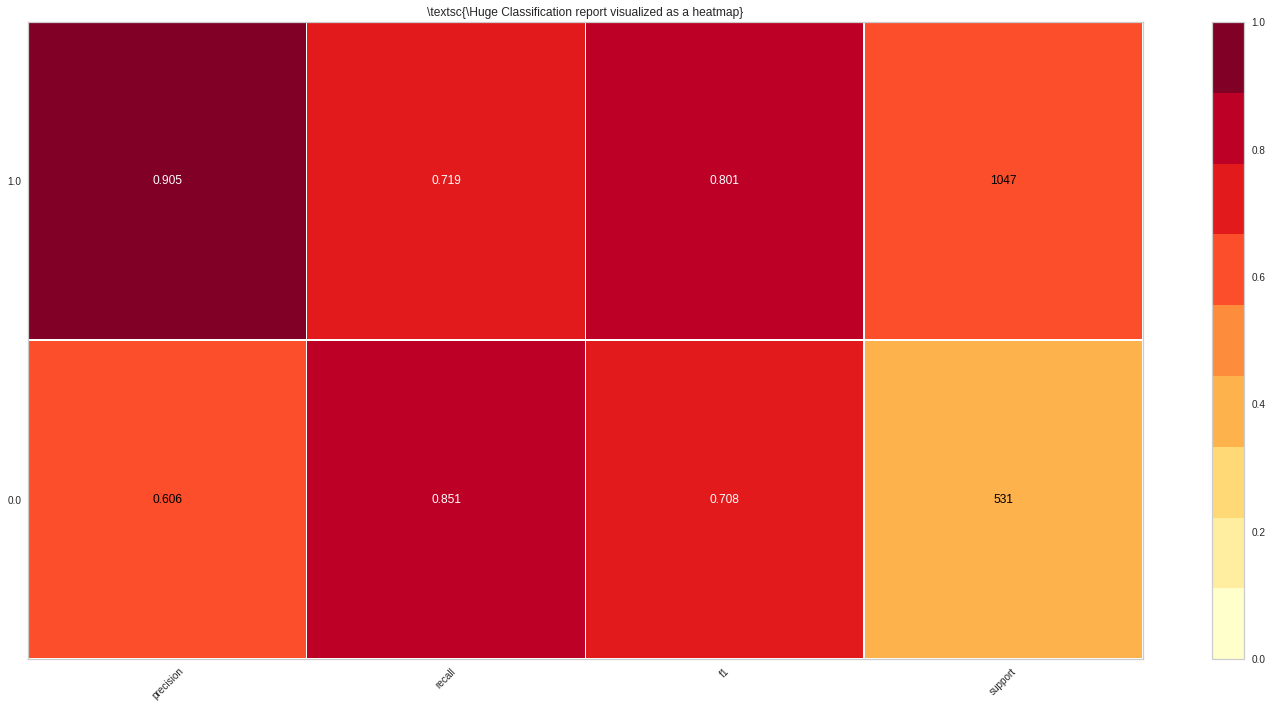

In [37]:
from yellowbrick.classifier import classification_report
classification_report(
    tree_classifier, X_train, y_train, X_test, y_test, classes=[0.0, 1.0], support=True,
    title=r'\textsc{\Huge Classification report visualized as a heatmap}'
);

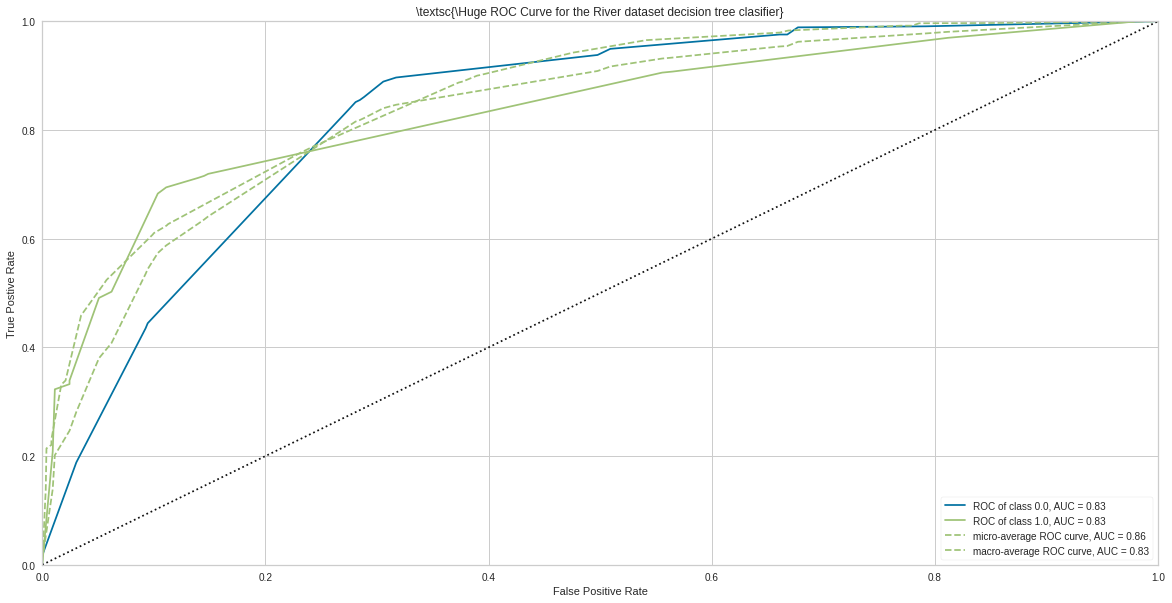

In [38]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(tree_classifier, X_train, y_train, X_test=X_test, y_test=y_test, classes=['0.0', '1.0'],                       title=r'\textsc{\Huge ROC Curve for the River dataset decision tree clasifier}',);

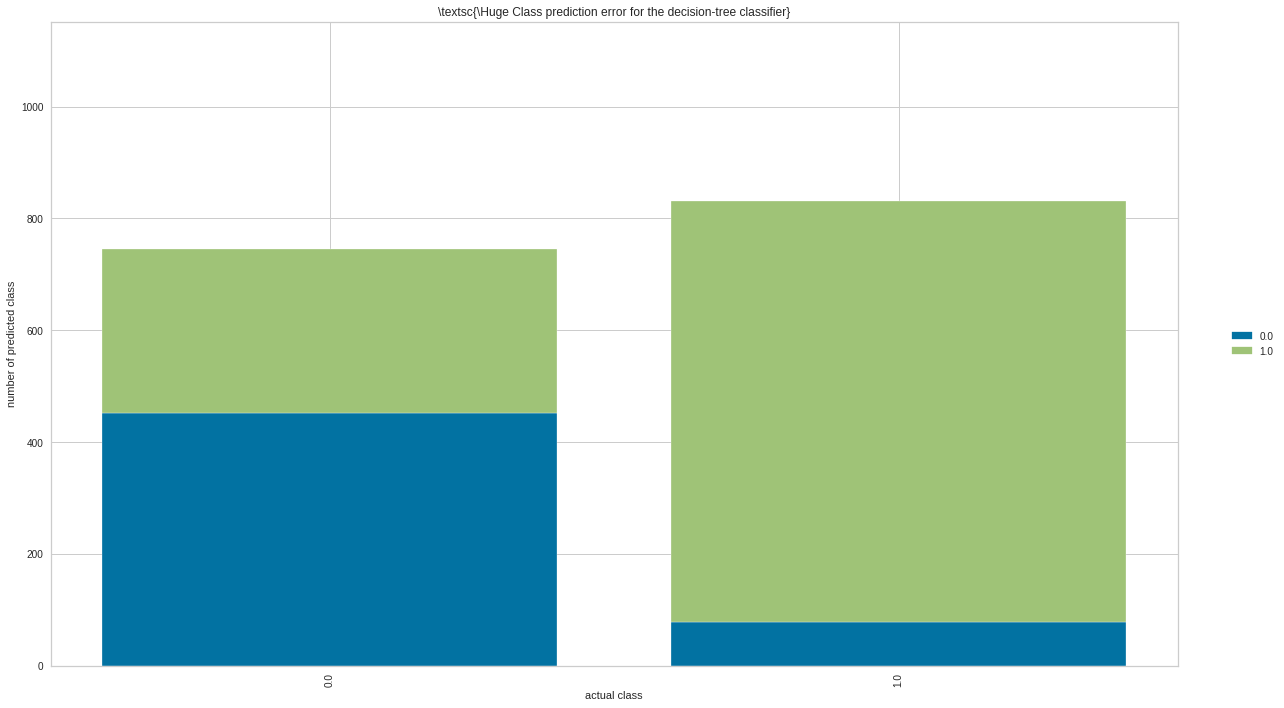

In [39]:
from yellowbrick.classifier import class_prediction_error
class_prediction_error(tree_classifier, X_train, y_train, X_test=X_test, y_test=y_test, classes=['0.0', '1.0'],                       title=r'\textsc{\Huge Class prediction error for the decision-tree classifier}',);

VISUALIZING THE DECISION TREE CLASSIFIER
Let us now visualize the decision tree that we have built.

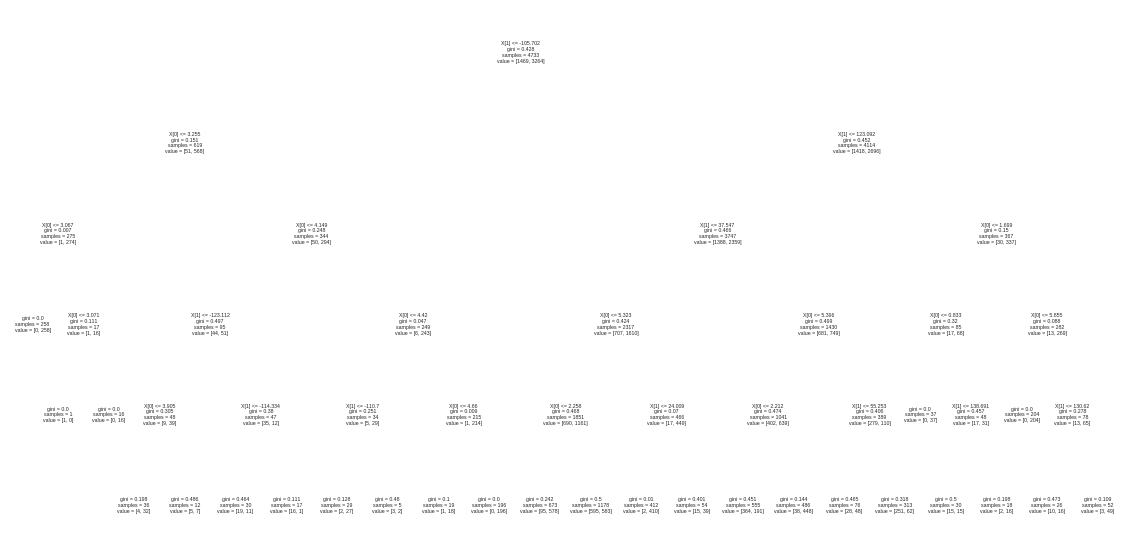

In [40]:
from sklearn.tree import plot_tree

# Since this takes a lot of time 
plot_tree(tree_classifier);

**RANDOM FOREST**

Why? Because we know that the drawback of the decision tree algorithm is that its overfits the model to the data. Then we need to usually prune the tree.With the random forest we dont need to prune as this method takes multiple trees so doesnt overfit to the data.

In [41]:
from sklearn.ensemble import RandomForestClassifier

forest_classifier = RandomForestClassifier(n_estimators = 1000, #number of trees
                                        n_jobs = 100,           #number of jobs to run in parallel
                                        random_state = 42).fit(X_train, y_train);
labels = forest_classifier.predict(X_test)

Random Forest Model Diagnostics

Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix
confmatrix = confusion_matrix(y_test, labels)
print(confmatrix)

[[419 112]
 [ 65 982]]


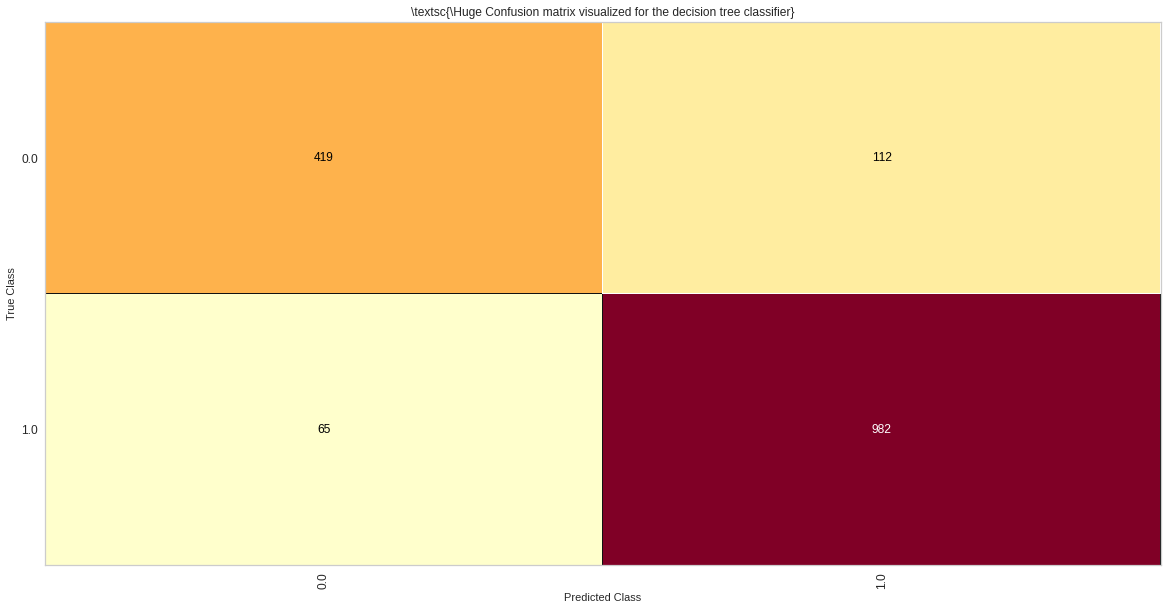

In [43]:
from yellowbrick.classifier import confusion_matrix

confusion_matrix (forest_classifier, X_train, y_train, X_test, y_test, classes=['0.0', '1.0'],
     title=r'\textsc{\Huge Confusion matrix visualized for the decision tree classifier}');

Classification Report

In [44]:
from sklearn.metrics import classification_report
report = classification_report (y_test, labels)
print(report)

              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83       531
         1.0       0.90      0.94      0.92      1047

    accuracy                           0.89      1578
   macro avg       0.88      0.86      0.87      1578
weighted avg       0.89      0.89      0.89      1578



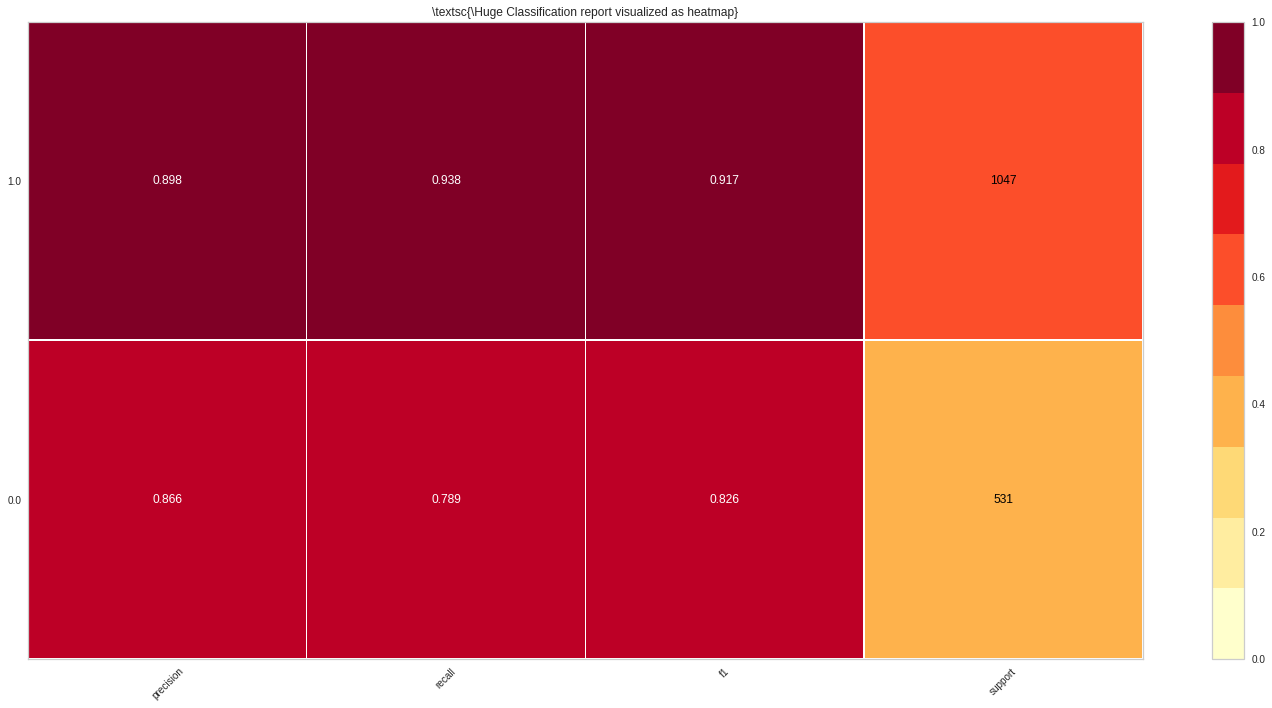

In [45]:
from yellowbrick.classifier import classification_report
classification_report(
    forest_classifier, X_train, y_train, X_test, y_test, classes=[0.0,1.0], support=True,
    title=r'\textsc{\Huge Classification report visualized as heatmap}');

Area Under the ROC Curve

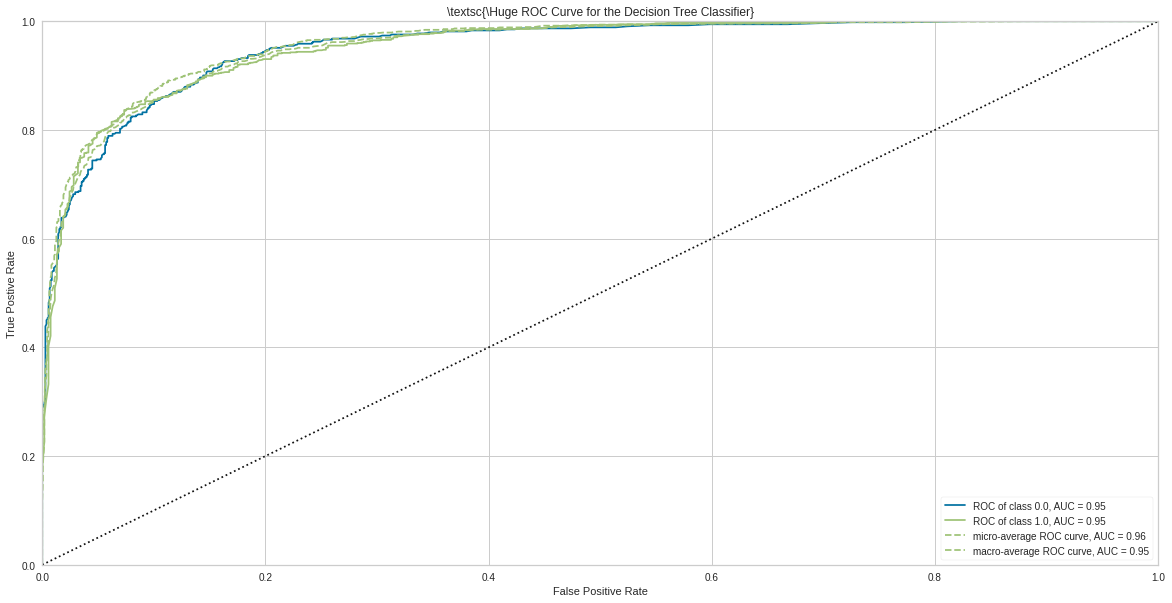

In [46]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(forest_classifier, X_train, y_train, X_test=X_test, y_test=y_test, classes=['0.0','1.0'], 
       title=r'\textsc{\Huge ROC Curve for the Decision Tree Classifier}',);

Class Prediction Errors Report

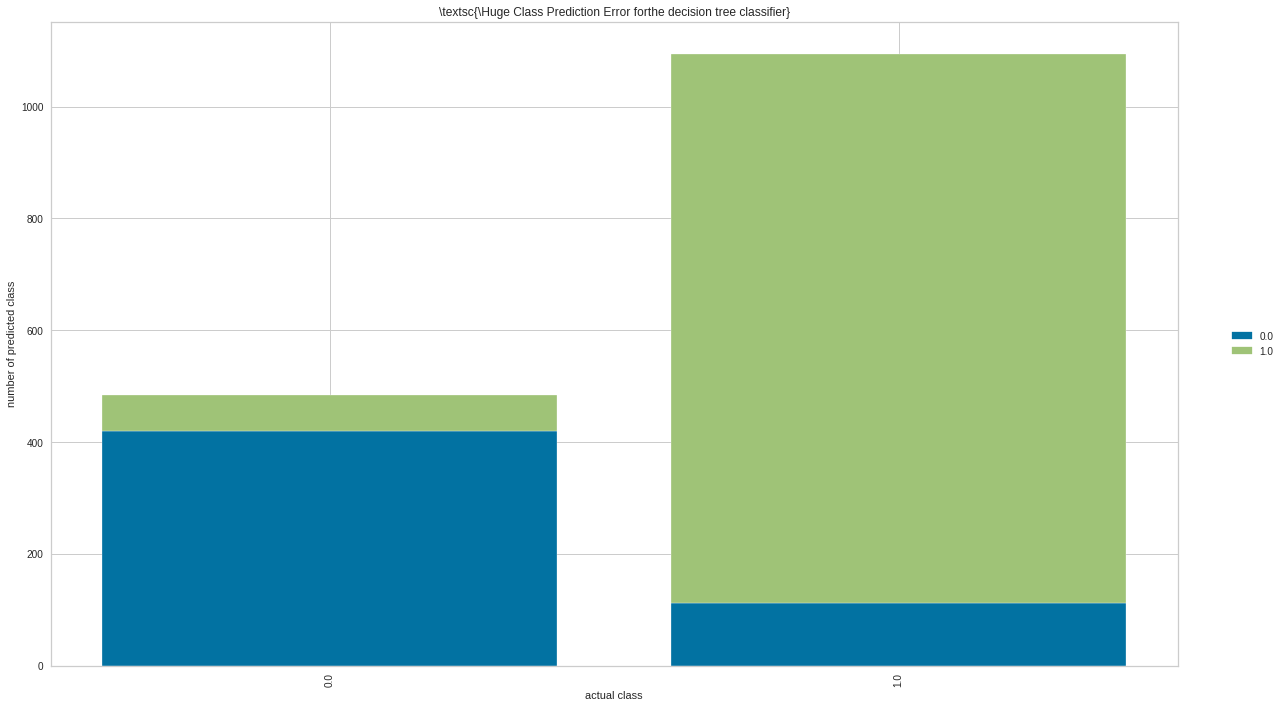

In [47]:
from yellowbrick.classifier import class_prediction_error
class_prediction_error(forest_classifier, X_train, y_train, X_test=X_test, y_test=y_test, classes=['0.0','1.0'], 
                       title=r'\textsc{\Huge Class Prediction Error forthe decision tree classifier}',);

Visualizing the trees in the random forest

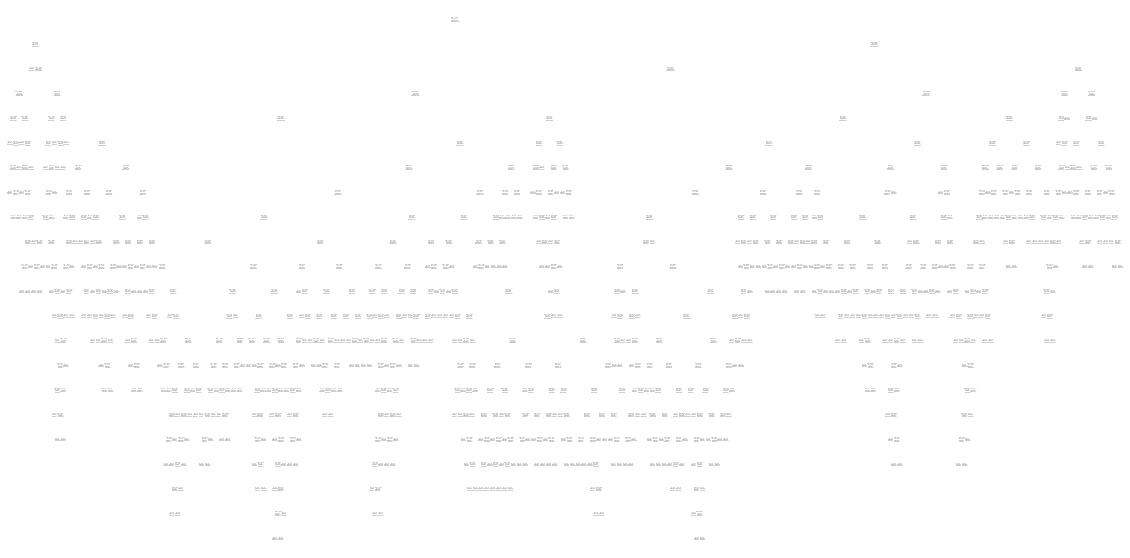

In [48]:
from sklearn.tree import plot_tree
plot_tree(forest_classifier.estimators_[0]);

**Feature Importance**

IndexError: index 1 is out of bounds for axis 0 with size 1

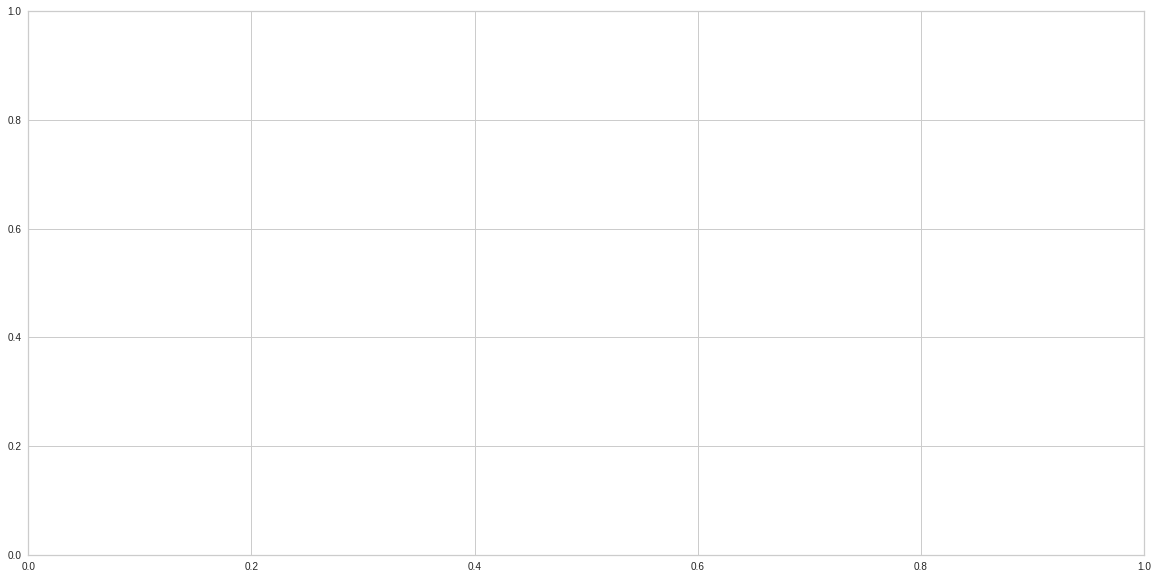

In [49]:
from yellowbrick.model_selection import feature_importances
feature_importances(forest_classifier, X, y)
#Feature Importance result - X1 is more important than X2, more by more than 20 percent)

**Support Vector Machines on the River Dataset**
2 Step process
1. Go to a linear higher diamenional space.
   a. Do the kernel ( functions of dot product)  
   b. Come back with results.
(The whole step on is possible by the kernel trick stated below)

2. Implement maximal margin classifier.

Now the question is how do we discover the linear higher diamensional space where the non linear river will become the linear?
The answer to that is that a lot of problems in ML can be formulated as A.B (dot products)
Let's say there are 3 points in the feature space. A,B and C. We have been given that dot products of X.A, X.B and X.C = some values. When we solve these equations, we get the value of X. If we plot X, X seems to be somewhere in between the other three points A, b and C.

* kernel trick - 
We can do the dot product in the higher diamensional space without necessarily finding the mapping or the translation rules from this space to that HD space.

In [53]:
## Let us first run the linear kernel

from sklearn import svm
svm_classifier = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='auto',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
svm_classifier.fit(X_train, y_train)

SVC(degree=5, gamma='auto', probability=True)

In [54]:
svm_classifier.support_vectors_.shape

(2698, 2)

In [55]:
## now let us make predictions
labels = svm_classifier.predict(X_test)

Model Diagnostics



Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix
confmatrix = confusion_matrix(y_test, labels)
print(confmatrix)

[[317 214]
 [116 931]]


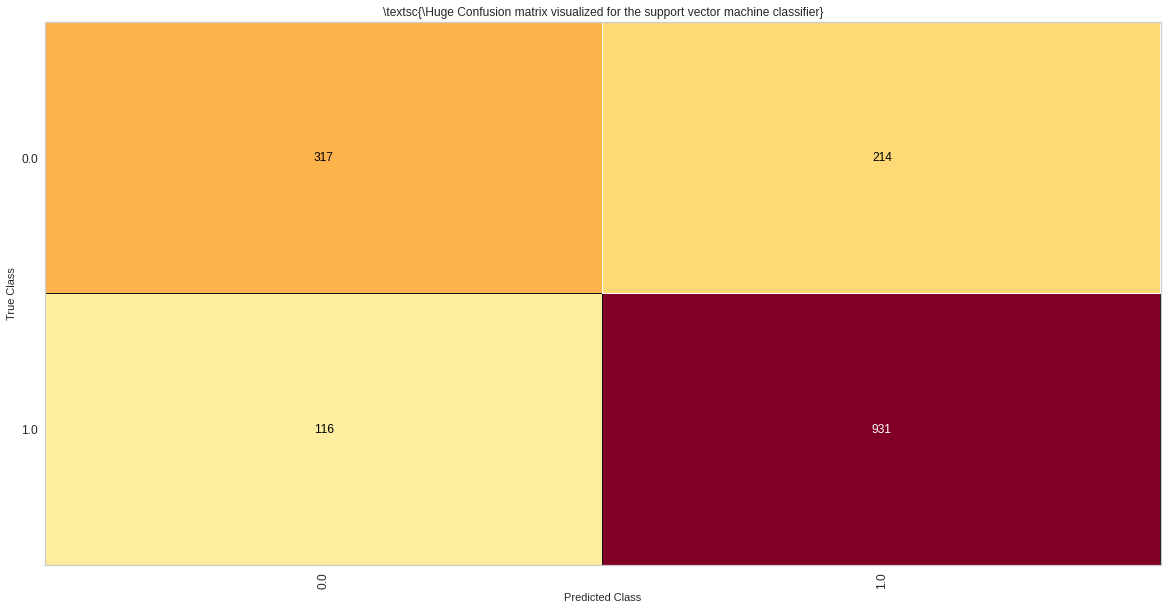

In [57]:
from yellowbrick.classifier import confusion_matrix
rc ('text', usetex=False)

confusion_matrix (svm_classifier, X_train, y_train, X_test, y_test, classes=['0.0', '1.0'],
     title=r'\textsc{\Huge Confusion matrix visualized for the support vector machine classifier}');

**Classification Report**

In [58]:
from sklearn.metrics import classification_report
report = classification_report(y_test, labels)
print(report)

              precision    recall  f1-score   support

         0.0       0.73      0.60      0.66       531
         1.0       0.81      0.89      0.85      1047

    accuracy                           0.79      1578
   macro avg       0.77      0.74      0.75      1578
weighted avg       0.79      0.79      0.78      1578



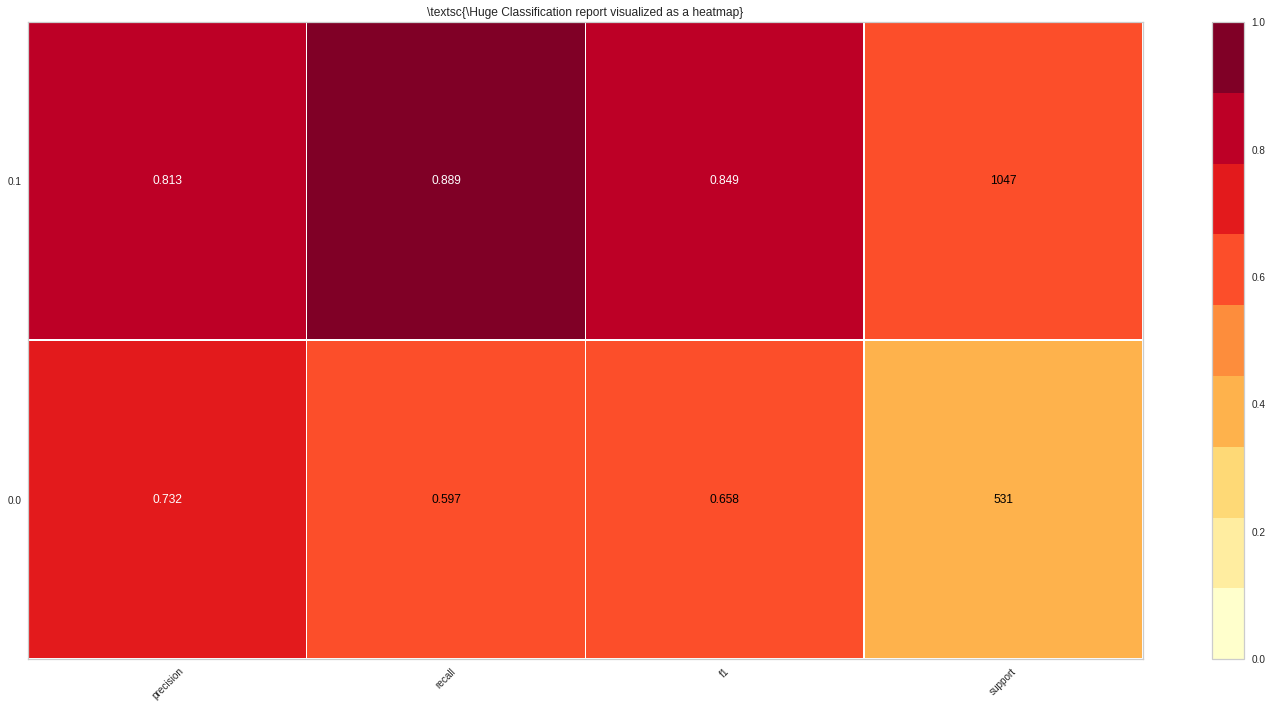

In [59]:
from yellowbrick.classifier import classification_report
classification_report(
svm_classifier, X_train, y_train, X_test, y_test, classes=[0.0,0.1], support=True,
title=r'\textsc{\Huge Classification report visualized as a heatmap}'
);

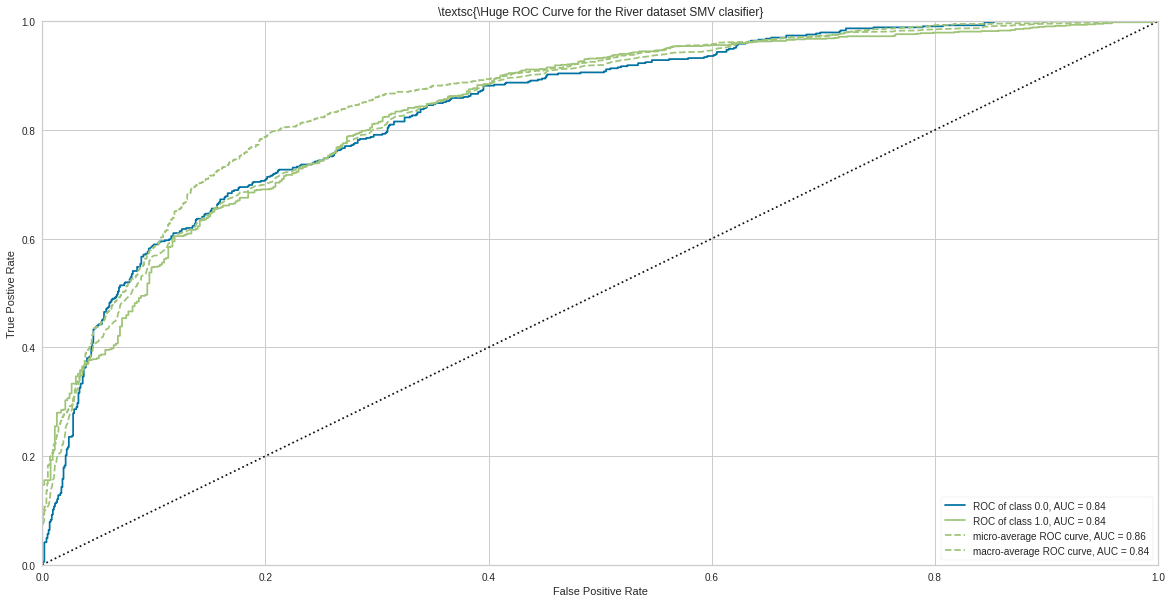

In [60]:
from yellowbrick.classifier.rocauc import roc_auc
roc_auc(svm_classifier, X_train, y_train, X_test=X_test, y_test=y_test, classes=['0.0', '1.0'],                       title=r'\textsc{\Huge ROC Curve for the River dataset SMV clasifier}',);

**CLASS PREDICTION ERRORS PLOT******

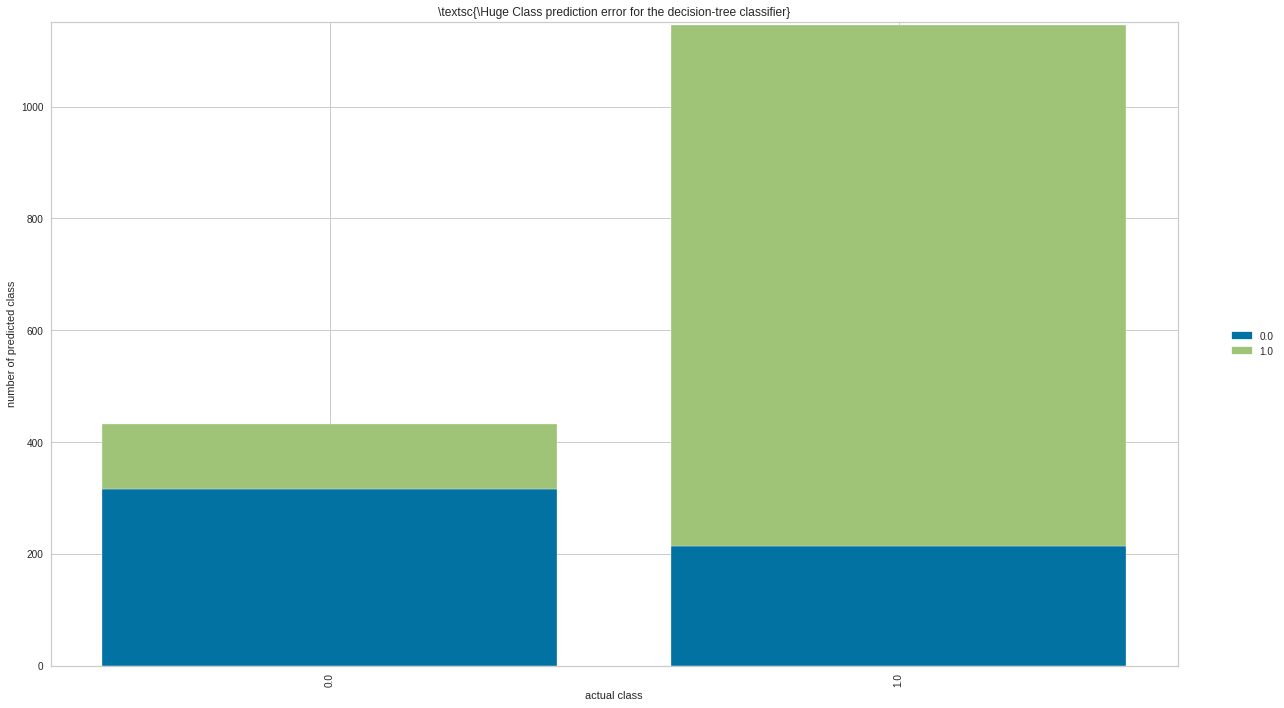

In [61]:
from yellowbrick.classifier import class_prediction_error
class_prediction_error(svm_classifier, X_train, y_train, X_test=X_test, y_test=y_test, classes=['0.0', '1.0'],                       title=r'\textsc{\Huge Class prediction error for the decision-tree classifier}',);

Discrimination Threshold

In [ ]:
from yellowbrick.classifier import discrimination_threshold
visualizer = discrimination_threshold(
    svm_classifier, X, y
)

In [67]:
! pip install -q shap
import shap

#shaply lib answers the question - how will you distribute the rewards proportional to contribution.
# we can apply shaply to any kind of model

In [ ]:
explainer = shap.KernelExplainer(svm_classifier.predict_proba, X_train, link='logit')
shap_values = explainer.shap_values(X_train, nsamples=10)

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")
#x2 is twice as important as x1
